In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
import yfinance
from datetime import datetime
import numpy as np
from statsmodels.stats.diagnostic import het_arch
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error



tickers = ['IBM','AMD', 'INTC', 'QCOM']
df=pd.DataFrame()
dat=datetime.strptime("2020-01-01", "%Y-%m-%d")
for col in tickers:
    temp= yfinance.download(col)[['Close']]
    if temp.index[0]>dat:
        dat=temp.index[0]
    #print(dat) 
    temp=temp.rename(columns={'Close':f'{col}'}).loc[dat:]    
    #temp=temp.loc[dat:]
    #print(temp.head(1))
    temp=np.log(temp)
    df=pd.concat([df,temp],axis=1)
    

df.head(2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,IBM,AMD,INTC,QCOM
Date,,,,
2020-01-02,4.863408,3.893859,4.108247,4.485147
2020-01-03,4.855401,3.883623,4.096010,4.466138


## Tests
The Arima model is based on the auto_arima() and then 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1337.378, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1344.675, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1342.692, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1342.691, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1344.339, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1340.692, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.465 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 674.338
Date:                Mon, 16 Dec 2024   AIC                          -1344.675
Time:                        21:19:01   BIC                          -1337.706
Sample:                             0   HQIC                         -1341.867
    

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/base/model.py:607: Con

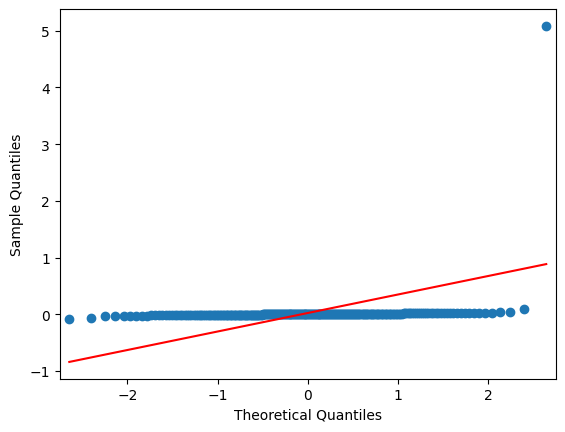

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-988.326, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-996.192, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-994.257, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-994.259, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-998.155, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-997.834, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.523 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 500.078
Date:                Mon, 16 Dec 2024   AIC                           -998.155
Time:                        21:19:01   BIC                           -994.671
Sample:                             0   HQIC                          -996.751
          

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


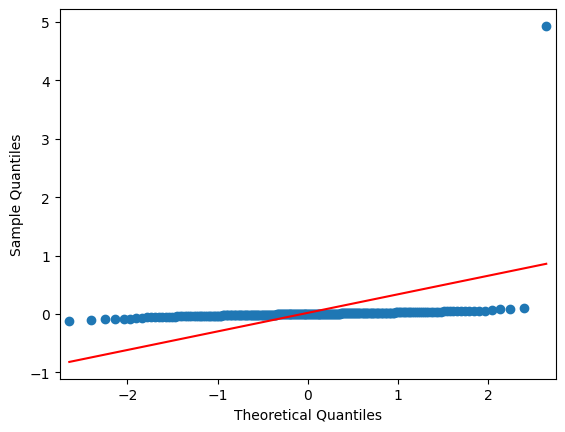

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-936.890, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-941.914, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-941.009, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-941.019, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-941.450, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-939.053, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.613 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 472.957
Date:                Mon, 16 Dec 2024   AIC                           -941.914
Time:                        21:19:02   BIC                           -934.944
Sample:                             0   HQIC                          -939.106
                                - 242                

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


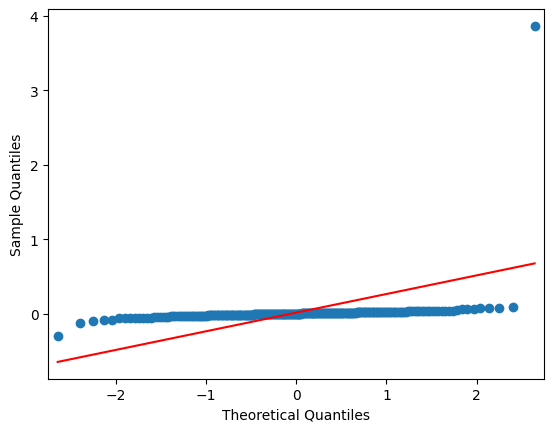

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1102.315, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1101.415, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1107.143, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1107.416, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1103.317, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1105.426, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1105.447, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1103.449, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1109.249, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1107.267, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1107.288, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1108.994, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1105.296, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.195 seconds
         

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


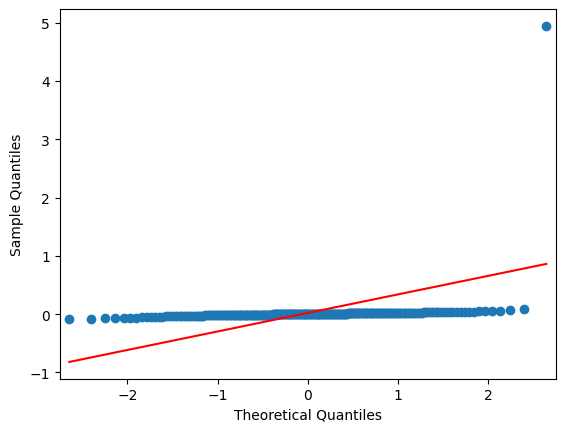

In [2]:
for tick in tickers:
    model=auto_arima(df[tick],seasonal=True,trace=True,stepwise=True)
    print(model.summary())
    

    p, d, q = model.order
    P, D, Q, m = model.seasonal_order
    models=SARIMAX(df[tick], order=(p,d,q), seasonal_order=(P,D,Q,m)).fit()
    resids=models.resid
    ljung=acorr_ljungbox(resids, lags=[10], return_df=True)
    print(f"{tick} ")
    print(f'P: {P}  Q: {Q}  D: {D}  m: {m}, p: {p}  q: {q}, d: {d}')
    print(f'{tick} Ljung-Box test: {ljung["lb_pvalue"].values[0]}')
    print('\n')
    test_stat, p_value, _, _ = het_arch(resids)
    print("ARCH-LM Test p-value:", p_value)
    
    stat, p = shapiro(resids)
    print(f"Shapiro-Wilk Test p-value: {p}")


    sm.qqplot(resids, line='s')
    plt.show()


## test -2
The shapiro test shows the lack of normality on the residuals of the arima model.


In [4]:
# Differencing the data to make it stationary
from sklearn.preprocessing import StandardScaler,MinMaxScaler


minmax = MinMaxScaler(feature_range=(0,1))
df_minmax=pd.DataFrame(minmax.fit_transform(df), index=df.index, columns=df.columns)
# Scaling the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# Display the transformed data
#print(df_scaled.head())
df_minmax.head()

,IBM,AMD,INTC,QCOM
Date,,,,
2024-01-02,0.036259,0.175234,0.962714,0.057445
2024-01-03,0.014629,0.128731,0.946315,0.020426
2024-01-04,0.026394,0.138666,0.942340,0.000000
2024-01-05,0.000000,0.175234,0.942782,0.008024
2024-01-08,0.030715,0.279530,0.976720,0.040641


## Redo the Test
- Shapiro
- Ljung-Box test
- ARCH-LM Test

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_standardized = StandardScaler().fit_transform(df)
pd.DataFrame(df_standardized,columns=df.columns).head()

,IBM,AMD,INTC,QCOM
0,-1.594579,-1.257847,1.568193,-1.819643
1,-1.675724,-1.483832,1.514247,-1.994969
2,-1.631586,-1.435551,1.501172,-2.091711
3,-1.730606,-1.257847,1.502627,-2.053706
4,-1.615378,-0.751006,1.614266,-1.899228


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-903.257, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-906.061, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-904.078, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-904.077, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-905.725, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-902.077, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.603 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 455.030
Date:                Mon, 16 Dec 2024   AIC                           -906.061
Time:                        21:20:00   BIC                           -899.091
Sample:                             0   HQIC                          -903.253
          

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


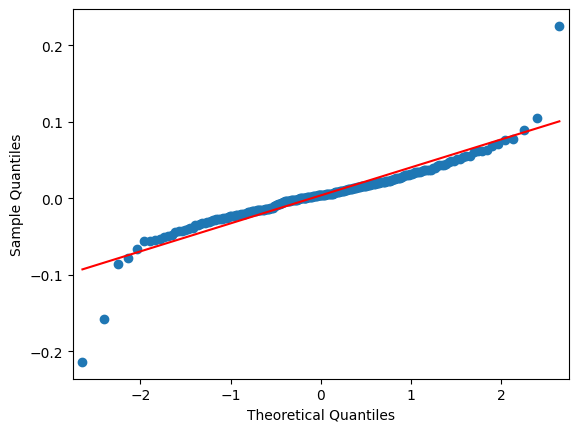

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-671.391, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-673.445, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-671.511, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-671.513, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-675.409, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-675.088, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.671 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 338.705
Date:                Mon, 16 Dec 2024   AIC                           -675.409
Time:                        21:20:01   BIC                           -671.924
Sample:                             0   HQIC                          -674.005
          

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


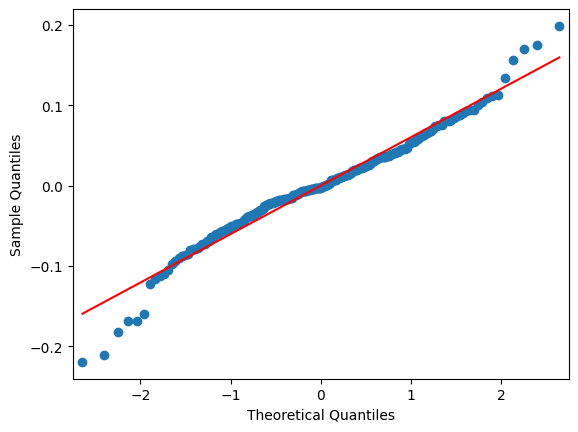

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-919.393, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-924.416, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-923.512, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-923.521, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-923.952, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-921.555, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.342 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 464.208
Date:                Mon, 16 Dec 2024   AIC                           -924.416
Time:                        21:20:01   BIC                           -917.447
Sample:                             0   HQIC                          -921.608
          

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


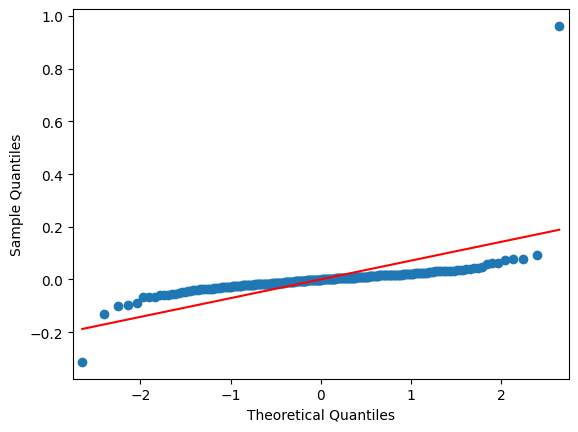

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-779.246, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-778.224, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-783.952, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-784.225, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-780.126, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-782.243, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-782.256, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-780.258, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-786.062, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-784.076, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-784.097, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-785.803, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-782.105, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.173 seconds
                      

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


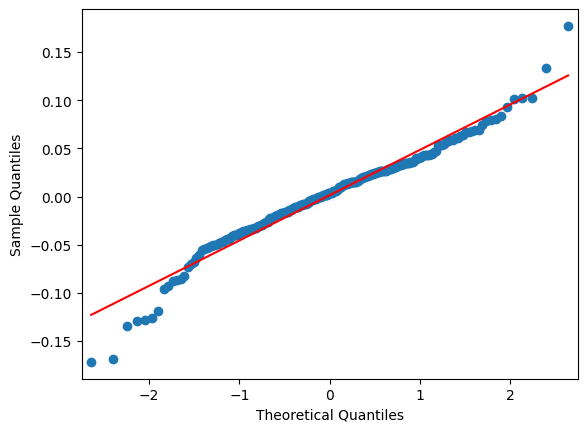

In [6]:

for tick in tickers:
    model=auto_arima(df_minmax[tick],seasonal=True,trace=True,stepwise=True)
    print(model.summary())
    

    p, d, q = model.order
    P, D, Q, m = model.seasonal_order
    models=SARIMAX(df_minmax[tick], order=(p,d,q), seasonal_order=(P,D,Q,m)).fit()
    resids=models.resid
    ljung=acorr_ljungbox(resids, lags=[10], return_df=True)
    print(f"{tick} ")
    print(f'P: {P}  Q: {Q}  D: {D}  m: {m}, p: {p}  q: {q}, d: {d}')
    print(f'{tick} Ljung-Box test: {ljung["lb_pvalue"].values[0]}')
    print('\n')
    test_stat, p_value, _, _ = het_arch(resids)
    print("ARCH-LM Test p-value:", p_value)
    
    #garch_model = arch_model(df['log_returns'], vol="Garch", p=1, q=1)
    #garch_result = garch_model.fit(disp="off")
    
    stat, p = shapiro(resids)
    print(f"Shapiro-Wilk Test p-value: {p}")


    sm.qqplot(resids, line='s')
    plt.show()


In [14]:
print(models.summary()) 

                               SARIMAX Results                                
Dep. Variable:                   QCOM   No. Observations:                  242
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  20.222
Date:                Mon, 16 Dec 2024   AIC                            -36.444
Time:                        19:47:22   BIC                            -29.474
Sample:                             0   HQIC                           -33.636
                                - 242                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1808      0.056     -3.205      0.001      -0.291      -0.070
sigma2         0.0495      0.003     14.450      0.000       0.043       0.056
Ljung-Box (L1) (Q):                   0.00   Jarque-

## StandardScaling or MinMaxScaling ?
Testing if the Standard scaling is better or the MinMaxScaler


In [15]:
m=[7,12]
for seasonality  in m:
    model=auto_arima(df["IBM"], seasonal=True, m=seasonality)
    resids=model.resid()
    ljung=acorr_ljungbox(resids, lags=[10], return_df=True)
    print(f"the Seasonality for : {seasonality}")
    print(f' Ljung-Box test: {ljung["lb_pvalue"].values[0]}')

the Seasonality for : 7
 Ljung-Box test: 0.9999999999999818
the Seasonality for : 12
 Ljung-Box test: 0.9999999999999818


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-903.257, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-906.061, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-904.078, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-904.077, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-905.725, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-902.077, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.637 seconds
Best ARIMA parameters for IBM: (0, 1, 0)


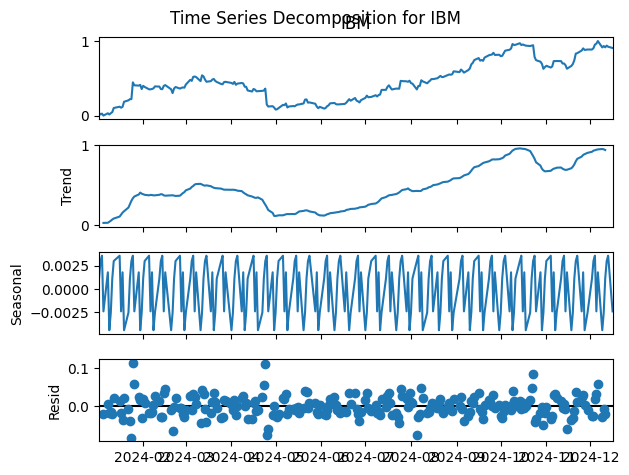

P, D, Q, m: (0, 0, 0, 0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.87546D+00    |proj g|=  1.05075D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     20      1     0     0   5.788D-03  -1.875D+00
  F =  -1.8754640640585880     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
MSE for IBM: 0.036800448496847445 
Summary for IBM:
                               SARIMAX Results                                
Dep. Variable:                    IBM 

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


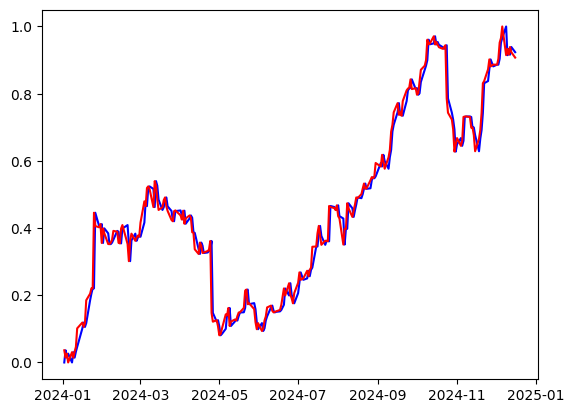

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


            forecast
date                
2024-12-17  0.907394
2024-12-18  0.907394
2024-12-19  0.907394
2024-12-20  0.907394
2024-12-23  0.907394


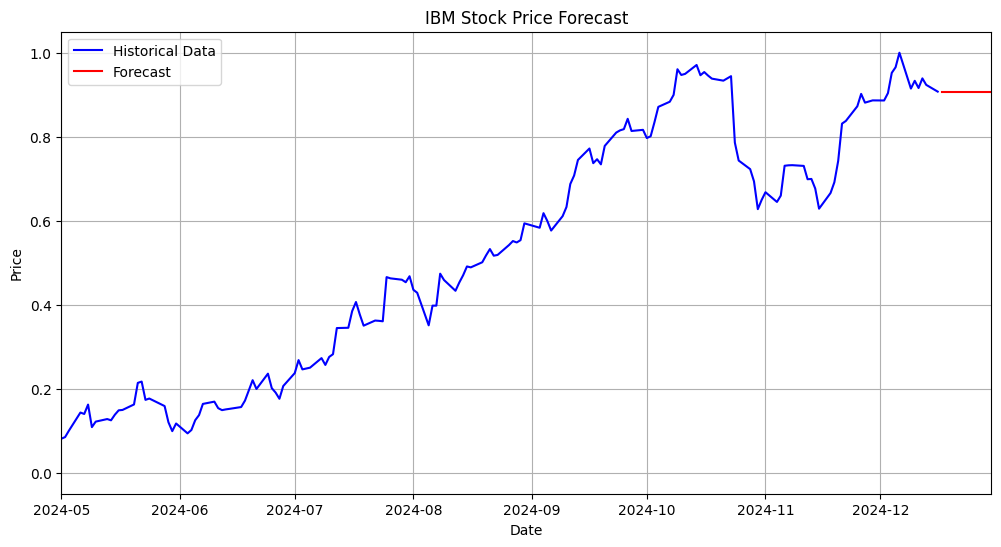

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-671.391, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-673.445, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-671.511, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-671.513, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-675.409, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-675.088, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.655 seconds
Best ARIMA parameters for AMD: (0, 1, 0)


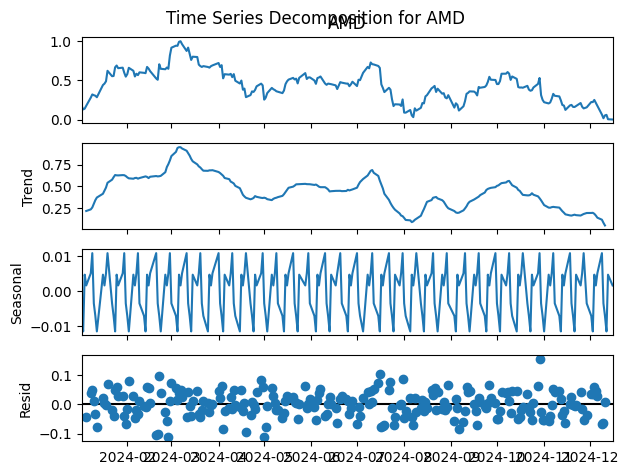

P, D, Q, m: (0, 0, 0, 0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.39960D+00    |proj g|=  6.69188D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     11      1     0     0   1.240D-03  -1.400D+00
  F =  -1.3996055522596154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
MSE for AMD: 0.06028611012046832 
Summary for AMD:
                               SARIMAX Results                                
Dep. Variable:                    AMD  

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


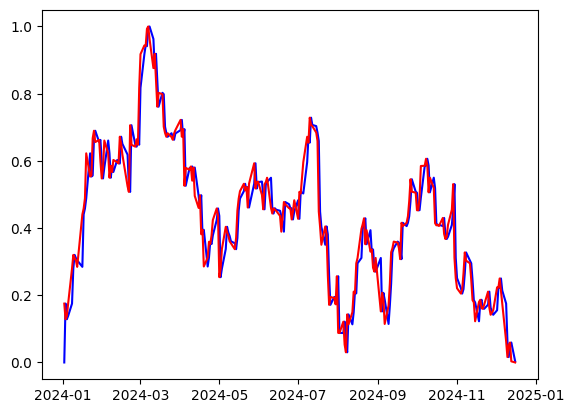

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                forecast
date                    
2024-12-17 -4.336809e-19
2024-12-18 -4.336809e-19
2024-12-19 -4.336809e-19
2024-12-20 -4.336809e-19
2024-12-23 -4.336809e-19


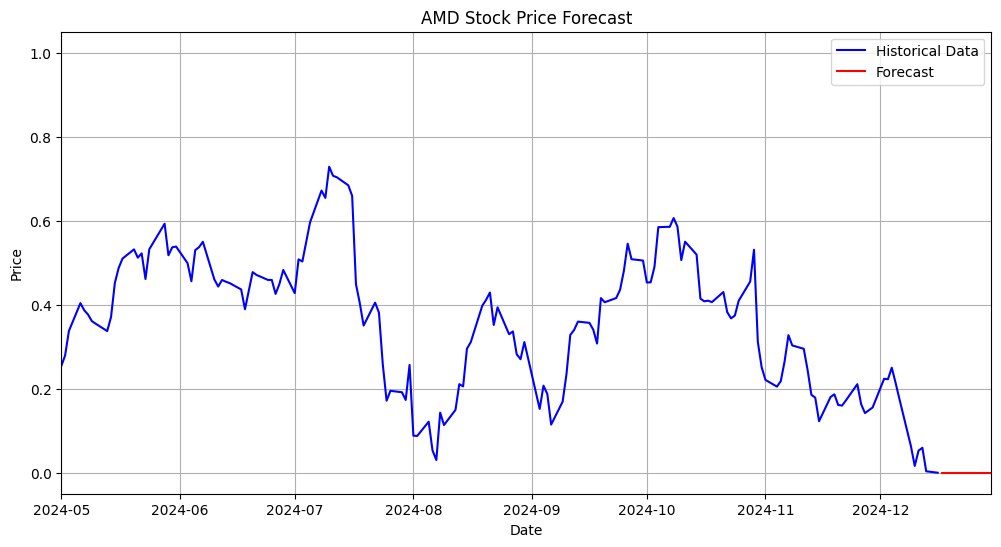

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-919.393, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-924.416, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-923.512, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-923.521, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-923.952, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-921.555, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.392 seconds
Best ARIMA parameters for INTC: (0, 1, 0)


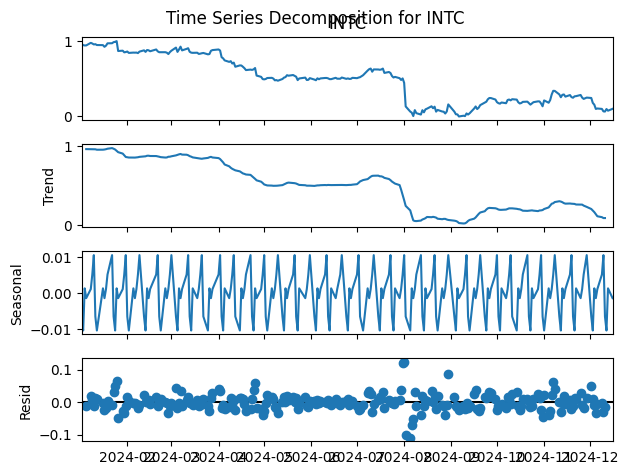

P, D, Q, m: (0, 0, 0, 0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.91312D+00    |proj g|=  1.08870D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     22      1     0     0   6.657D-03  -1.913D+00
  F =  -1.9131246620043822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
MSE for INTC: 0.0712770198154185 
Summary for INTC:
                               SARIMAX Results                                
Dep. Variable:                   INTC 

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


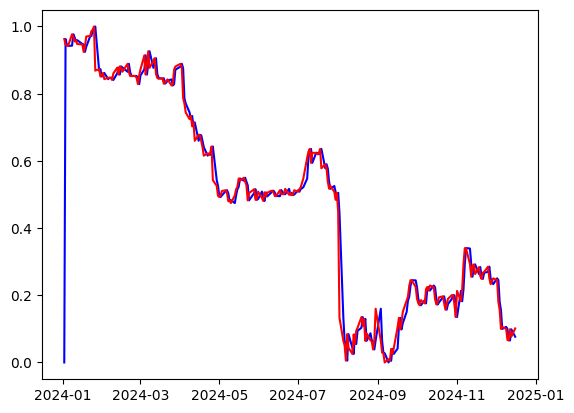

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


            forecast
date                
2024-12-17  0.101376
2024-12-18  0.101376
2024-12-19  0.101376
2024-12-20  0.101376
2024-12-23  0.101376


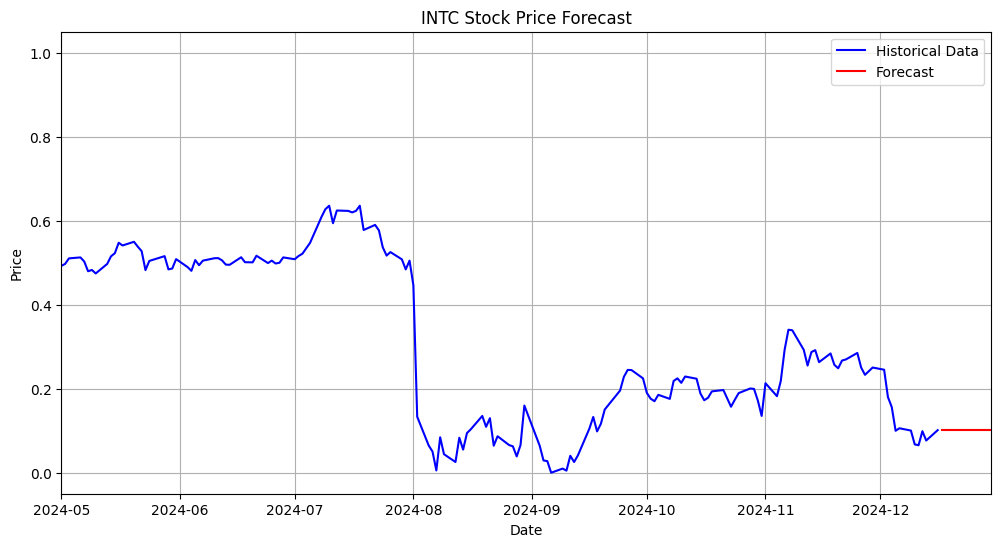

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-779.246, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-778.224, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-783.952, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-784.225, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-780.126, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-782.243, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-782.256, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-780.258, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-786.062, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-784.076, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-784.097, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-785.803, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-782.105, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.086 seconds
Best ARIMA parameters 

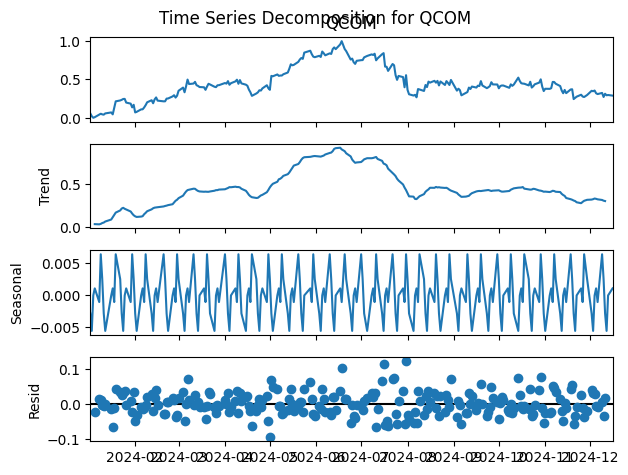

P, D, Q, m: (0, 0, 0, 0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.63232D+00    |proj g|=  2.33658D-01

At iterate    5    f= -1.63235D+00    |proj g|=  2.16492D-02

At iterate   10    f= -1.63236D+00    |proj g|=  3.44472D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     14      1     0     0   3.445D-05  -1.632D+00
  F =  -1.6323598252452867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
MSE for QCOM: 0.04702496036352862 
Summary fo

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


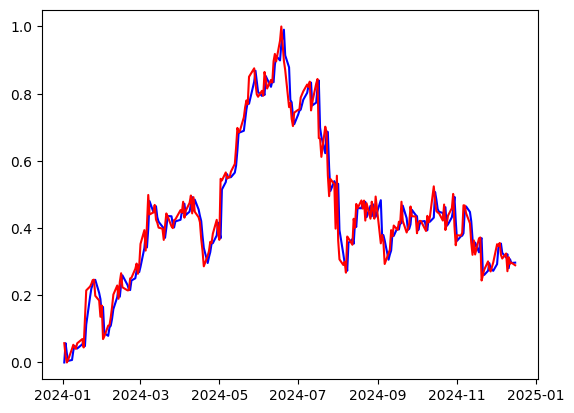

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


            forecast
date                
2024-12-17   0.29076
2024-12-18   0.29076
2024-12-19   0.29076
2024-12-20   0.29076
2024-12-23   0.29076


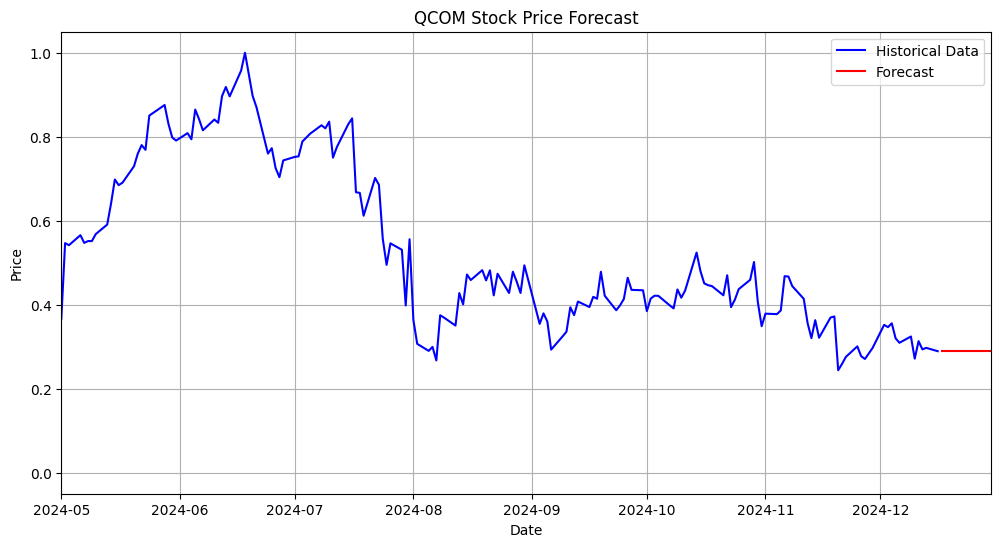

In [17]:

forecast_steps=10
def plotting_forecast(df, tick, model, forecast_steps):
        forecast = model.forecast(steps=forecast_steps)
        forecast_index = pd.date_range(start=df[tick].index[-1], periods=forecast_steps + 1, freq='B')[1:]

        forecast_series= pd.DataFrame({"forecast":forecast,"date":forecast_index}).set_index("date")

        print(forecast_series.head()) 
        
        plt.figure(figsize=(12, 6))
        plt.plot(df[tick], label='Historical Data', color='blue')
        plt.plot(forecast_series, label='Forecast', color='red')

        start_date = '2024-05-01'
        end_date = forecast_index[-1]
        plt.xlim(pd.Timestamp(start_date), end_date)

        plt.title(f'{tick} Stock Price Forecast')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

for tick in tickers:
    model = auto_arima(df_minmax[tick],seasonal=True,trace=True,stepwise=True)
    
    print(f"Best ARIMA parameters for {tick}: {model.order}")

    decomposition = seasonal_decompose(df_minmax[tick], model='additive', period=7)
    decomposition.plot()
    plt.suptitle(f'Time Series Decomposition for {tick}')
    plt.show()

    p, d, q = model.order
    P, D, Q, m = model.seasonal_order
    
    print(f"P, D, Q, m: {P, D, Q, m}")
    
    sarimax_model = SARIMAX(df_minmax[tick],
                            #m=252, 
                            order=(p, d, q), 
                            seasonal_order=(P, D, Q, m)).fit()

    in_sample_forecast = sarimax_model.predict(start=0, end=len(df_minmax)-1,typ="levels")
    rmse = mean_squared_error(df_minmax[tick], in_sample_forecast, squared=False)

    print(f"MSE for {tick}: {rmse} ")
    
    print(f"Summary for {tick}:")
    print(sarimax_model.summary())
    
    print(f"End of the summary for {tick}\n")
    
    residuals = sarimax_model.resid
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(f"the ljungbox test: \n",lb_test)
    
    plt.plot(in_sample_forecast, label='In-sample forecast',color='blue')
    plt.plot(df_minmax[tick], label='Actual data',color='red')
    plt.show()
    
    plotting_forecast(df_minmax, tick, sarimax_model, forecast_steps)
#model = auto_arima(df["NVDA"],seasonal=True,m=12,trace=True,stepwise=True)
#print(model.order)
#print(model.seasonal_order)



/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer 

            forecast
date                
2024-12-17  0.911138
2024-12-18  0.914729
2024-12-19  0.918320
2024-12-20  0.921911
2024-12-23  0.925501


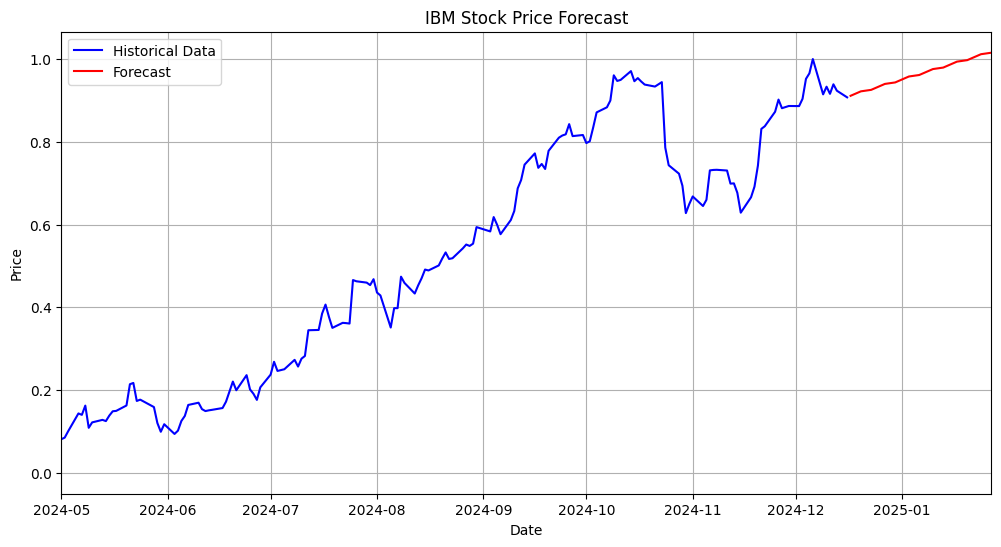

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = ExponentialSmoothing(df_minmax["IBM"], trend='add', seasonal=None).fit()
ets_forecast = ets_model.forecast(steps=forecast_steps)

#plt.plot(df_minmax["IBM"], label='Historical Data', color='blue')
#plt.plot(ets_forecast, label='Forecast', color='red')
plotting_forecast(df_minmax, "IBM", ets_model, 30)

23:50:07 - cmdstanpy - INFO - Chain [1] start processing
23:50:07 - cmdstanpy - INFO - Chain [1] done processing
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


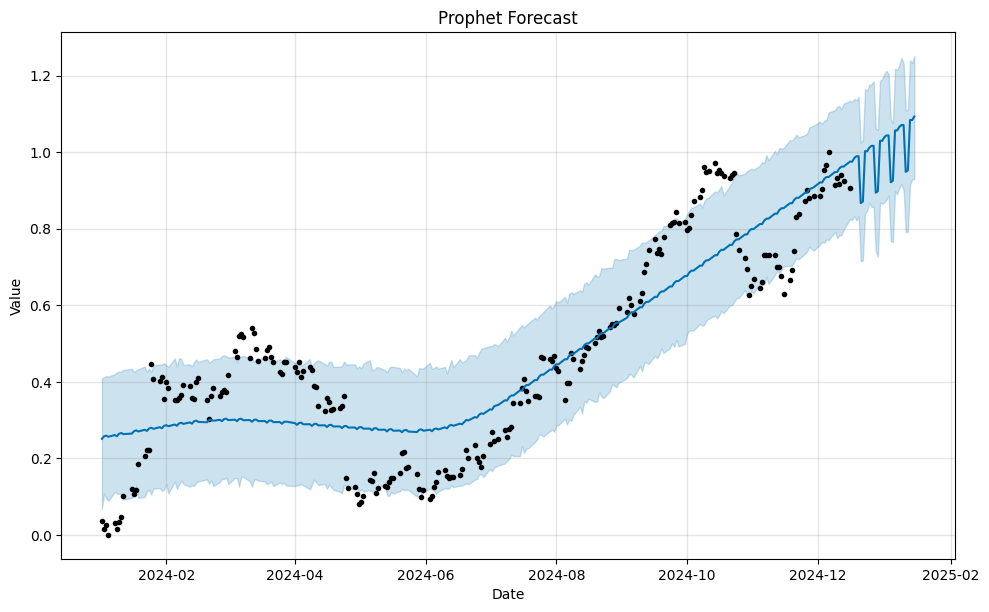

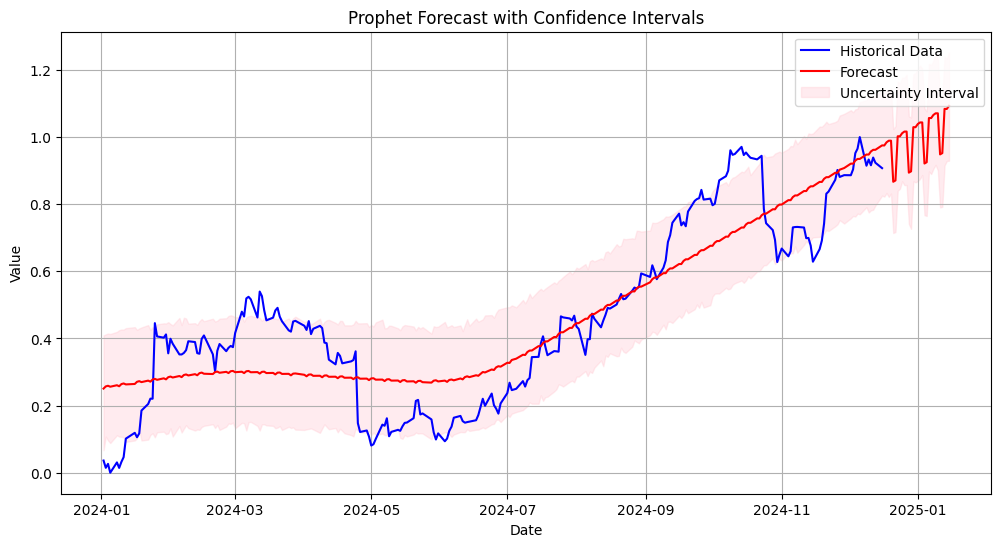

In [58]:
from prophet.make_holidays import make_holidays_df
from prophet import Prophet

forecast_steps = 30
df_prophet = df_minmax["IBM"].reset_index().rename(columns={'Date': 'ds', 'IBM': 'y'})


model = Prophet().fit(df_prophet)
future = model.make_future_dataframe(periods=forecast_steps)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# Plot the historical data
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label="Historical Data", color='blue')

# Plot the forecasted data
plt.plot(forecast['ds'], forecast['yhat'], label="Forecast", color='red')

# Add uncertainty intervals
plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    color='pink',
    alpha=0.3,
    label="Uncertainty Interval"
)

plt.title("Prophet Forecast with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


## Comparison

               IBM          AMD         INTC         QCOM
count  1248.000000  1248.000000  1248.000000  1248.000000
mean      4.940230     4.577444     3.715065     4.881728
std       0.181466     0.357646     0.316703     0.236495
min       4.506480     3.656098     2.938633     4.109397
25%       4.815052     4.366373     3.442899     4.756990
50%       4.900666     4.565129     3.796163     4.895187
75%       4.989327     4.849351     3.982062     5.048910
max       5.472439     5.353657     4.226396     5.425346


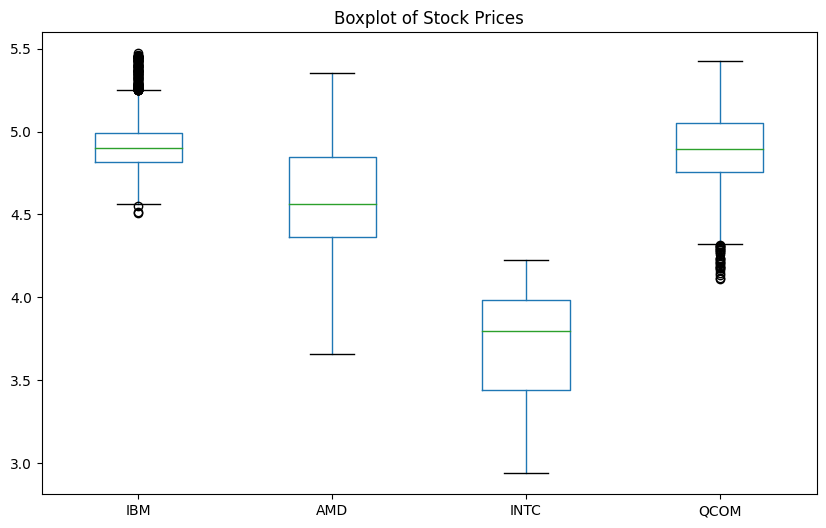

In [62]:
import pandas as pd

# Assuming df contains stock prices for four companies: ['CompanyA', 'CompanyB', 'CompanyC', 'CompanyD']
print(df.describe())

# Boxplot
df.boxplot(figsize=(10, 6), grid=False)
plt.title("Boxplot of Stock Prices")
plt.show()


In [64]:
from scipy.stats import f_oneway

# Perform ANOVA test
stat, p = f_oneway(df['IBM'], df['AMD'], df['INTC'], df['QCOM'])
print(f"ANOVA Statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("Reject H₀: At least one company has a significantly different mean price.")
else:
    print("Fail to reject H₀: No significant difference in mean prices.")


ANOVA Statistic: 5029.517828661708, p-value: 0.0
Reject H₀: At least one company has a significantly different mean price.


In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Reshape data for Tukey's test
df_melt = pd.melt(df.reset_index(), id_vars='Date', var_name='Company', value_name='Price')

# Perform Tukey's HSD
tukey = pairwise_tukeyhsd(df_melt['Price'], df_melt['Company'], alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   AMD    IBM   0.3628   0.0  0.3338  0.3918   True
   AMD   INTC  -0.8624   0.0 -0.8913 -0.8334   True
   AMD   QCOM   0.3043   0.0  0.2753  0.3332   True
   IBM   INTC  -1.2252   0.0 -1.2541 -1.1962   True
   IBM   QCOM  -0.0585   0.0 -0.0875 -0.0295   True
  INTC   QCOM   1.1667   0.0  1.1377  1.1956   True
---------------------------------------------------


Correlation Matrix:
           IBM       AMD      INTC      QCOM
IBM   1.000000  0.679854 -0.578941  0.532685
AMD   0.679854  1.000000 -0.362509  0.833446
INTC -0.578941 -0.362509  1.000000 -0.287220
QCOM  0.532685  0.833446 -0.287220  1.000000


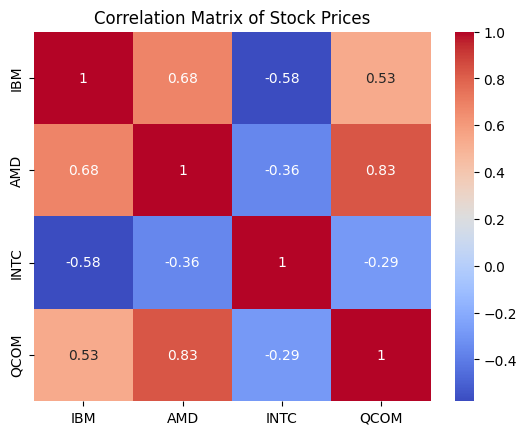

In [68]:
# Pearson Correlation
correlation = df.corr()
print("Correlation Matrix:")
print(correlation)

# Visualization
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Stock Prices")
plt.show()


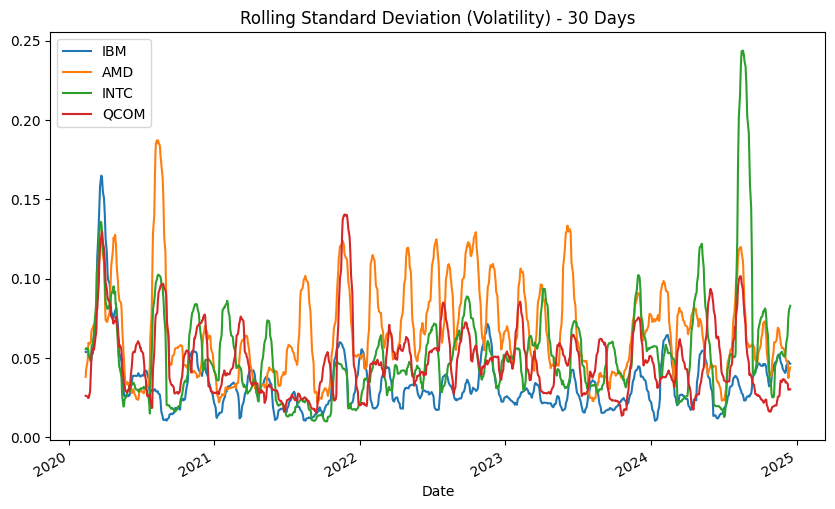

In [71]:
# Rolling standard deviation
rolling_std = df.rolling(window=30).std()
rolling_std.plot(figsize=(10, 6))
plt.title("Rolling Standard Deviation (Volatility) - 30 Days")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import coint

stat, p_value, _ = coint(df['QCOM'], df['INTC'])
print(f"Cointegration Test p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: IBM and INTC are cointegrated. move together over time")

Cointegration Test p-value: 0.3876217787889601
